# 응용통계학
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

In [10]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

In [11]:
library(np)
data("cps71")
attach(cps71)

The following objects are masked from cps71 (pos = 3):

    age, logwage




In [12]:
reg.npbw <- npregbw(logwage ~ age, regtype = "lc")
reg.np <- npreg(reg.npbw)

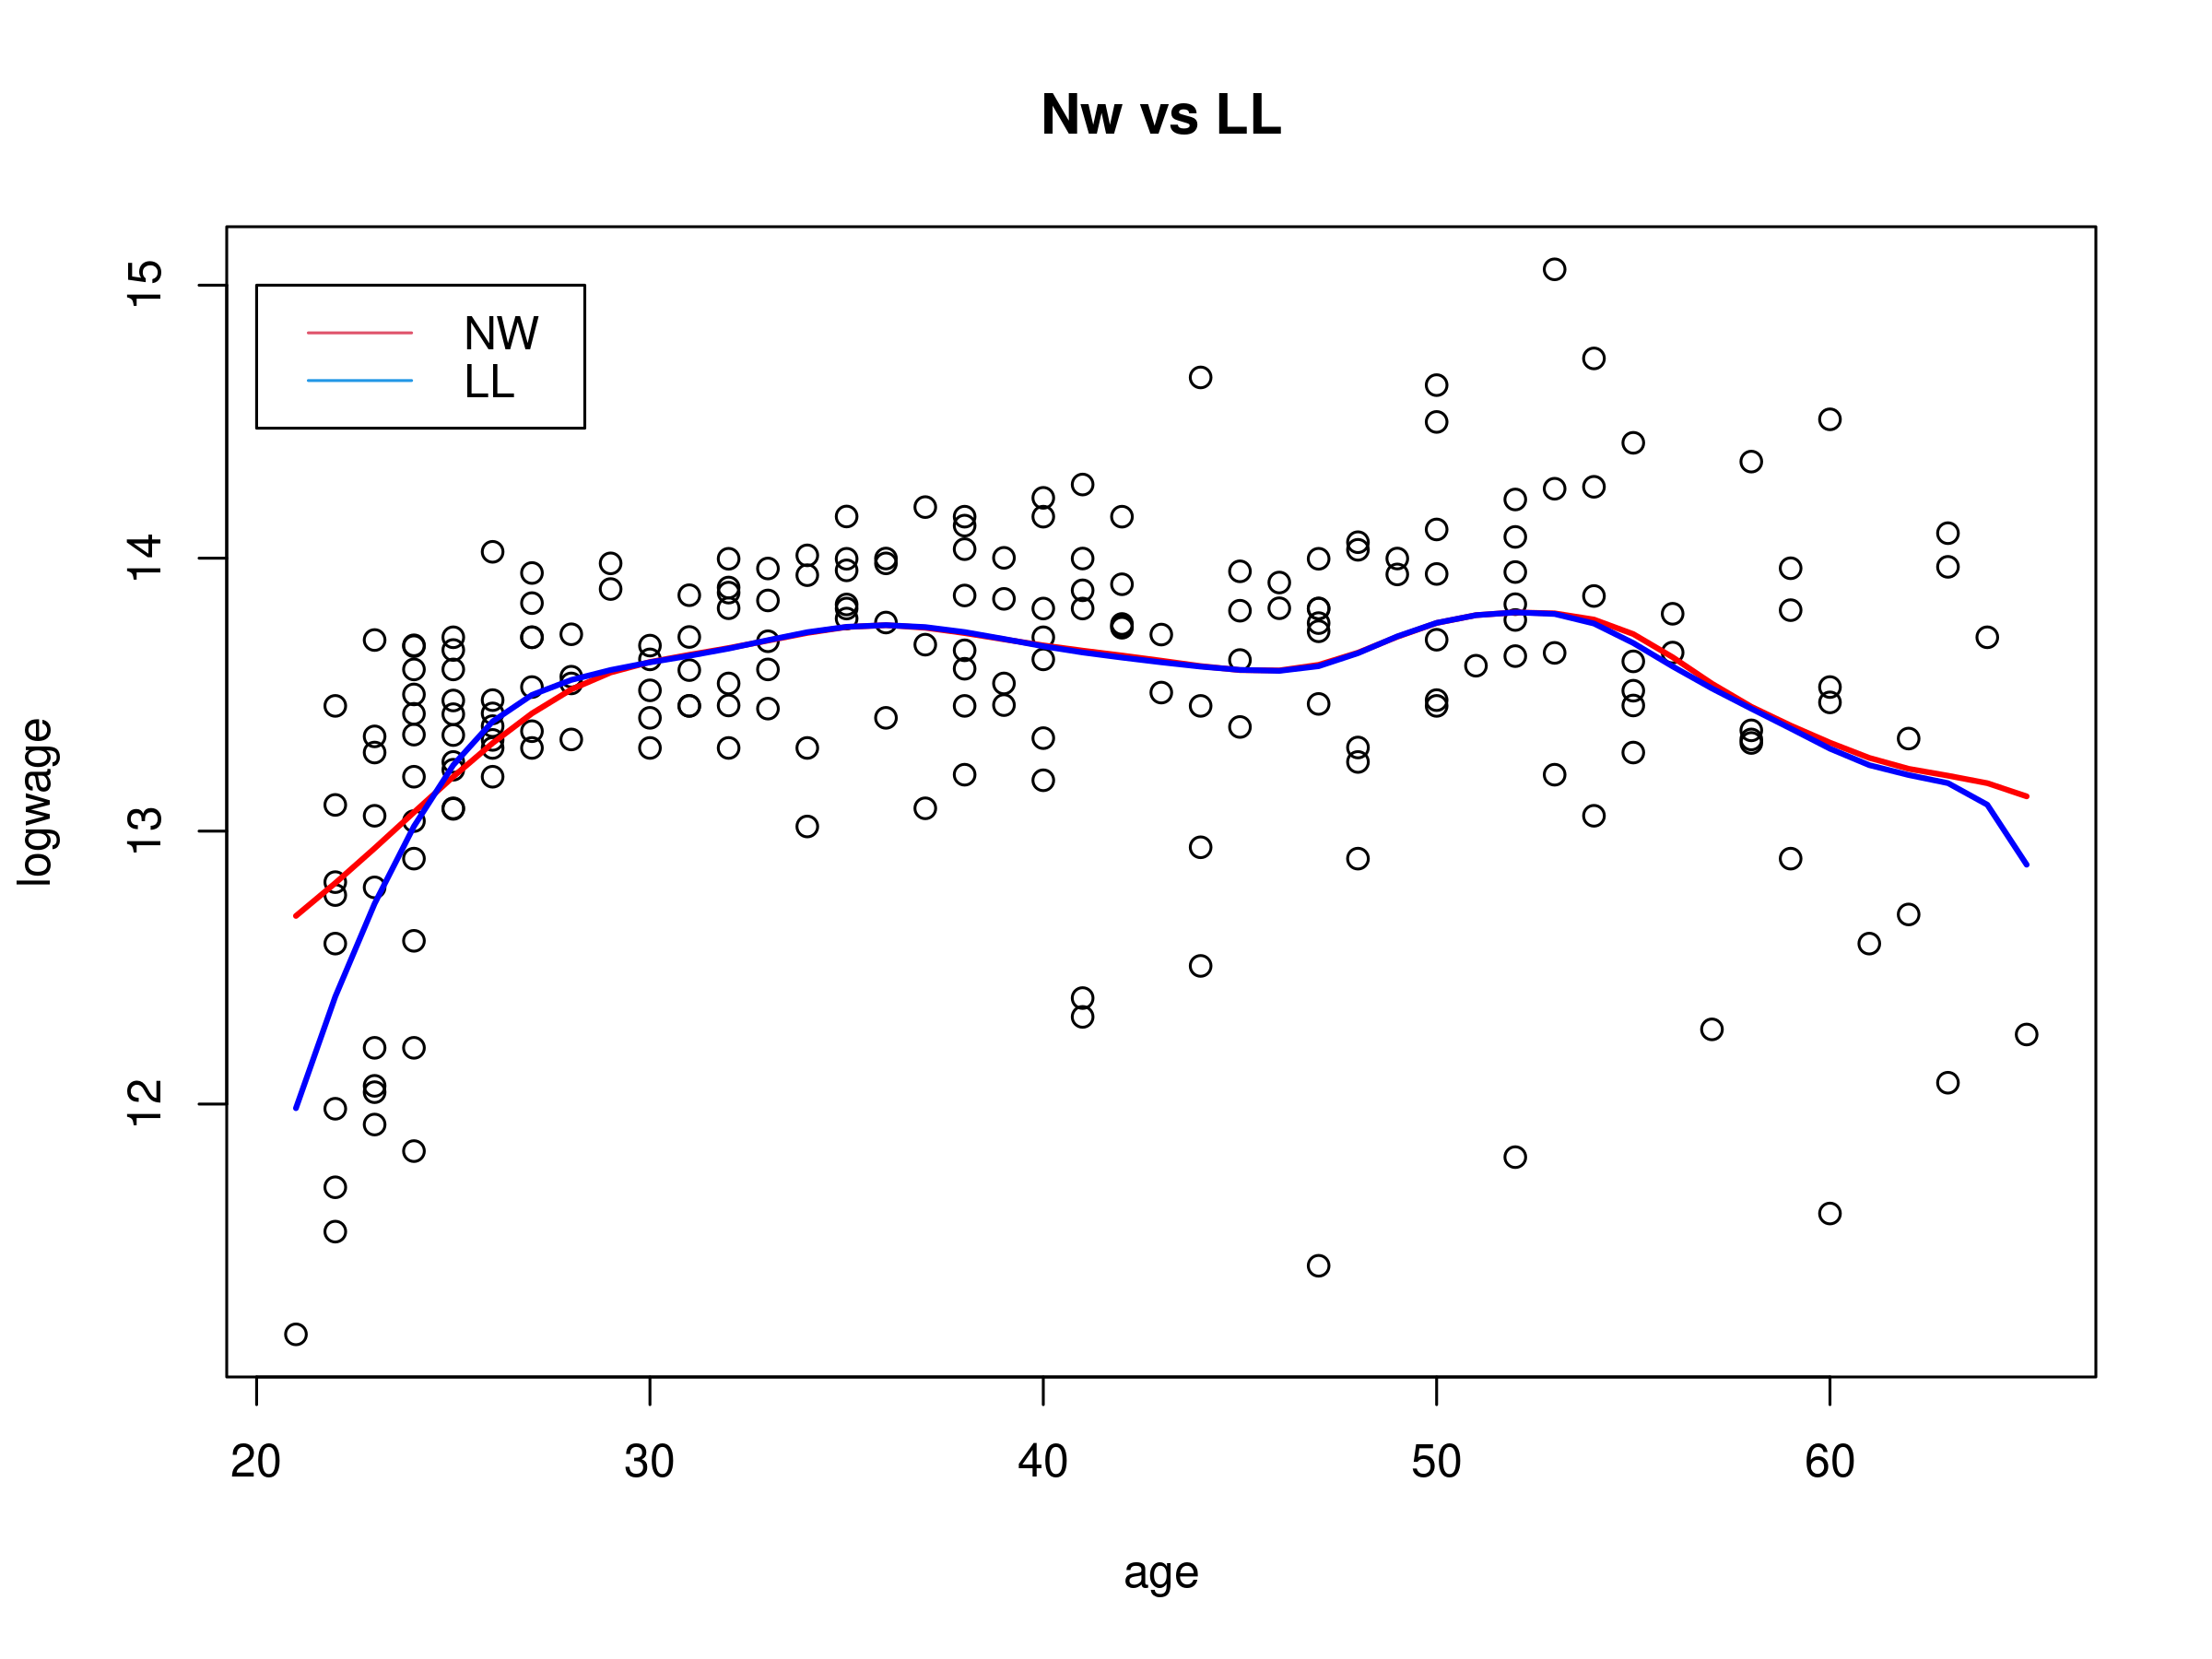

In [13]:
# bws를 2,3,10,0.3.. 바꿔가면서 시도
# bws 빼면 bws 자동으로 계산한다. 
nw <- npreg(logwage ~ age, regtype = "lc",bws=2)
# 이렇게도 쓸 수 있다. bws = reg.npbw
# lc: local constant
# ll: local linear
# kernal option: ckertype=?
plot(age,logwage,main="Nw vs LL")
lines(age,nw$mean,col="red",lwd=2)

ll <- npreg(logwage ~ age,regtype="ll",bws=2)
#plot(age,logwage)
lines(age,ll$mean,col="blue",lwd=2)

legend(20,15,c("NW","LL"),col=c(2,12),lty=c(1,1))

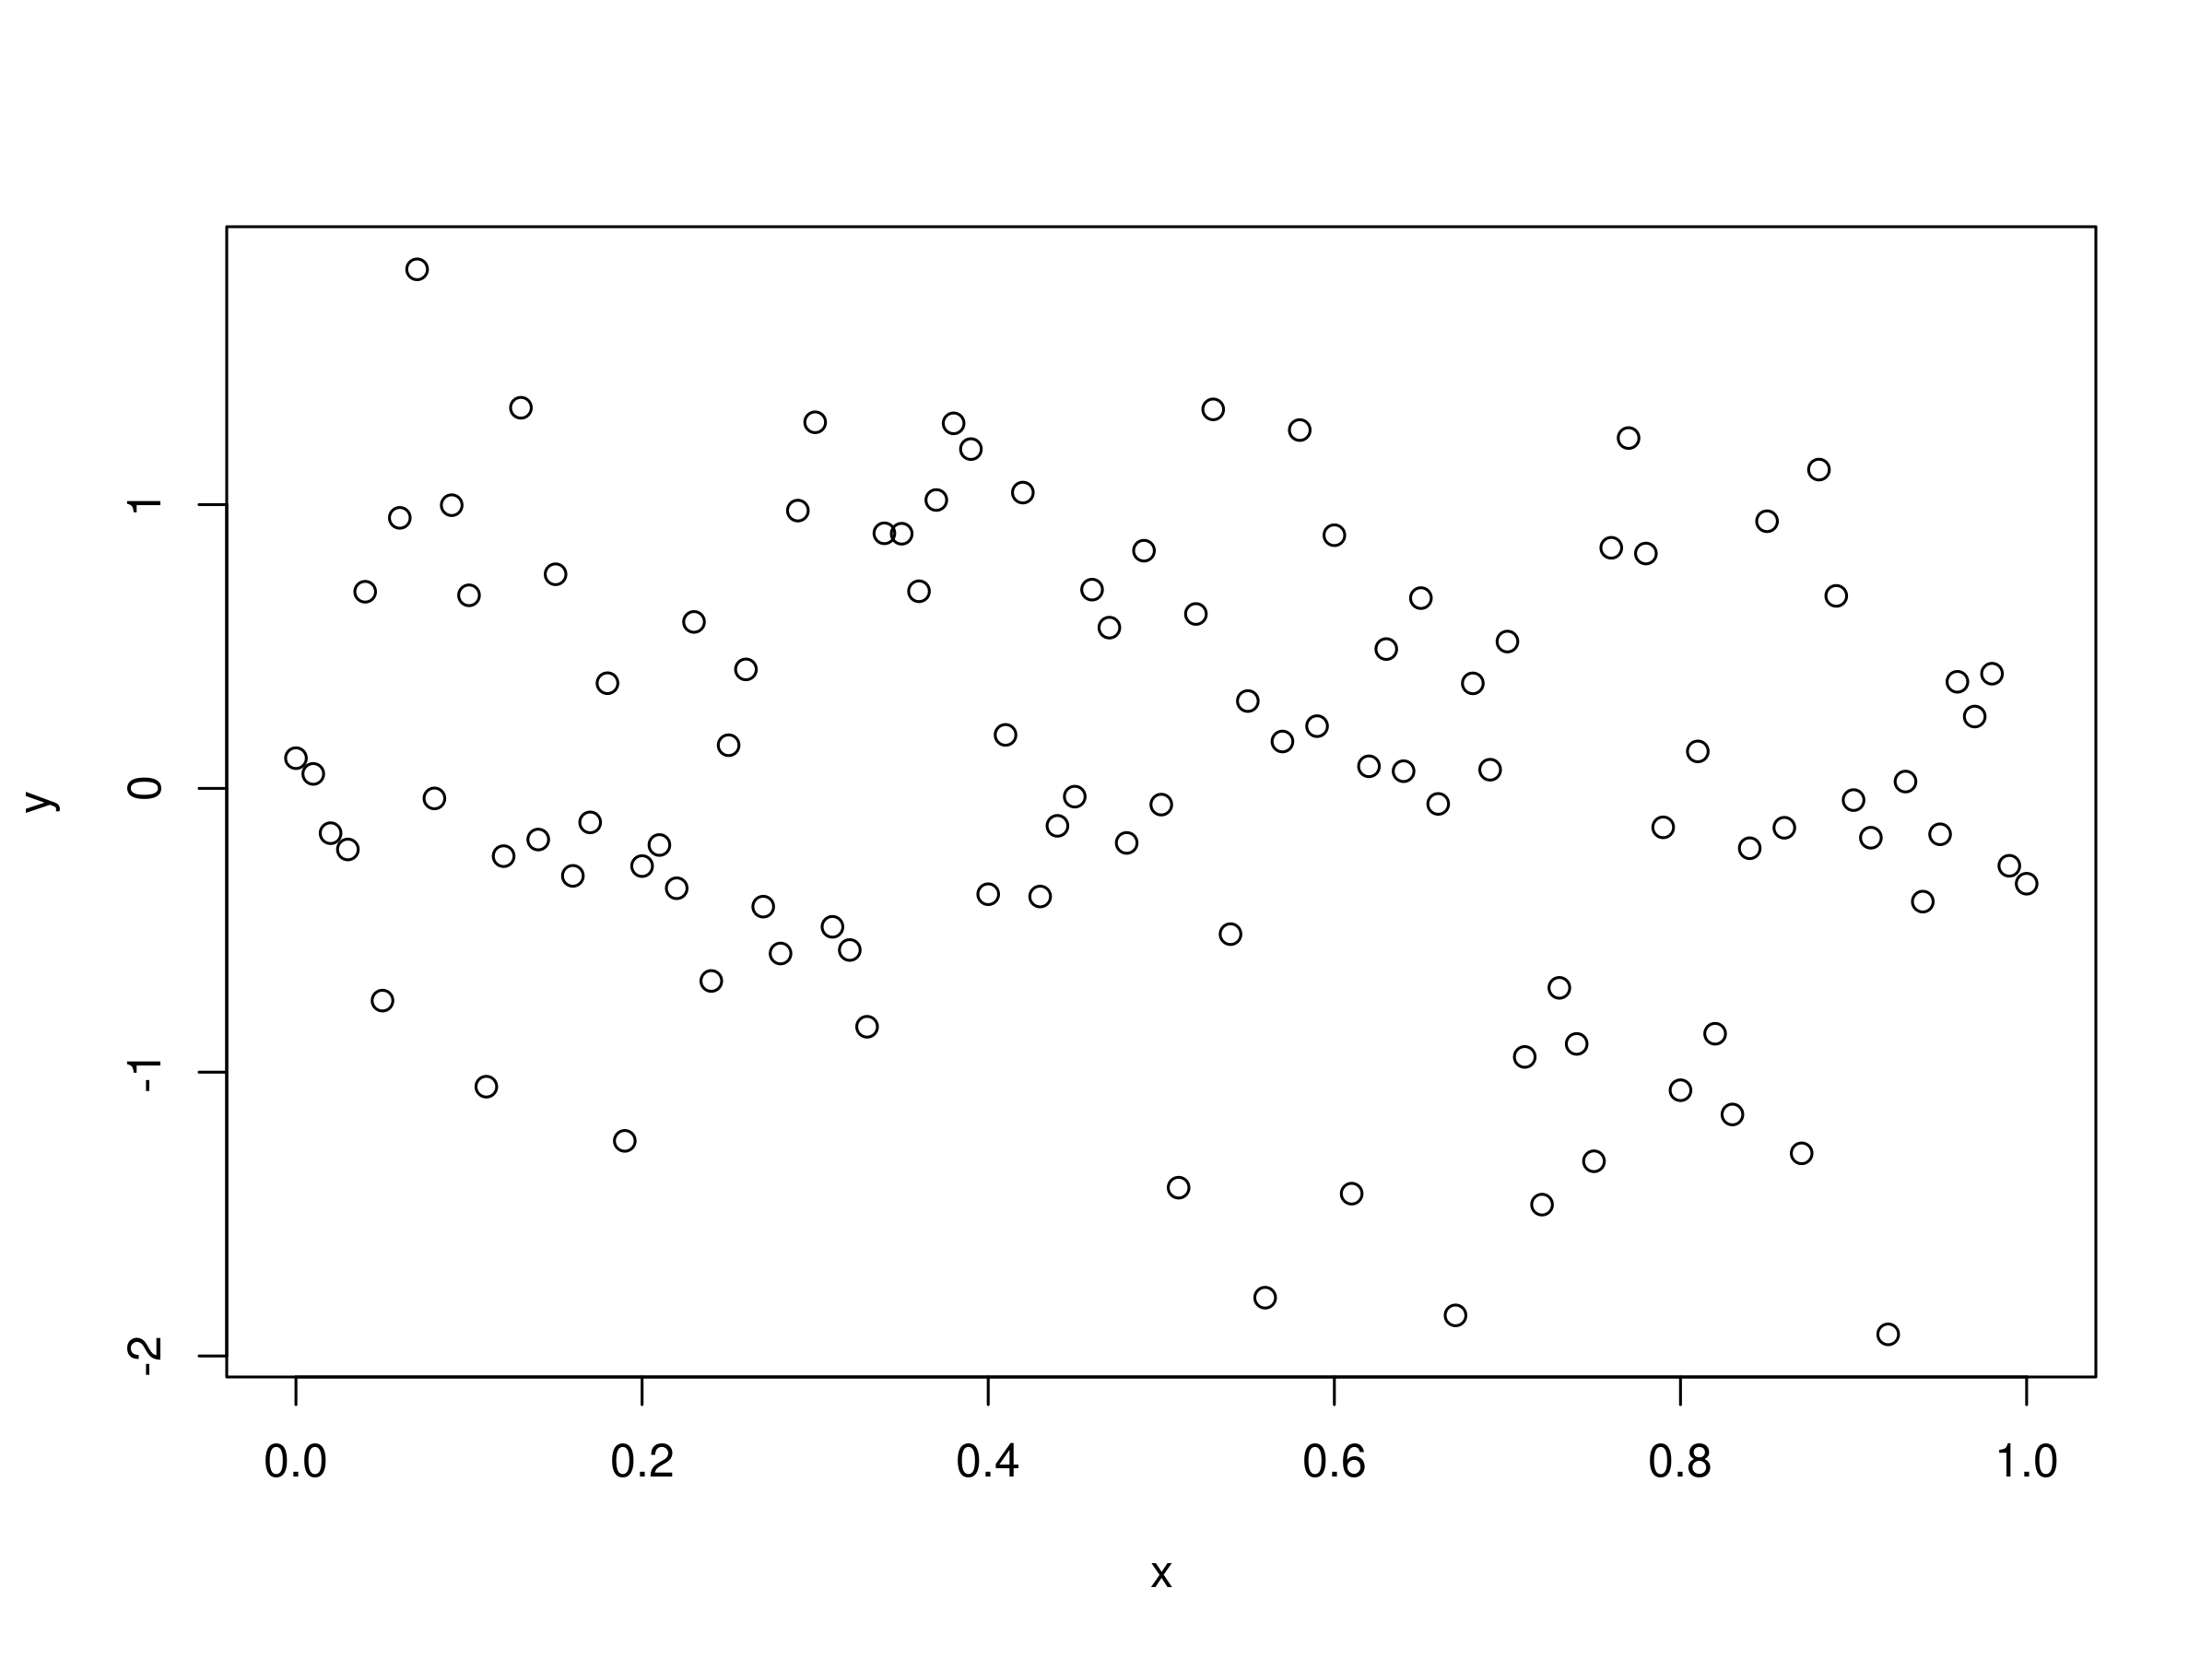

In [14]:
# 함수적 관계 없을 때, 상수 관계밖에 없을 때, 선형 관계 없을때
x = seq(0,1,0.01)
y=rnorm(101)
plot(x,y)

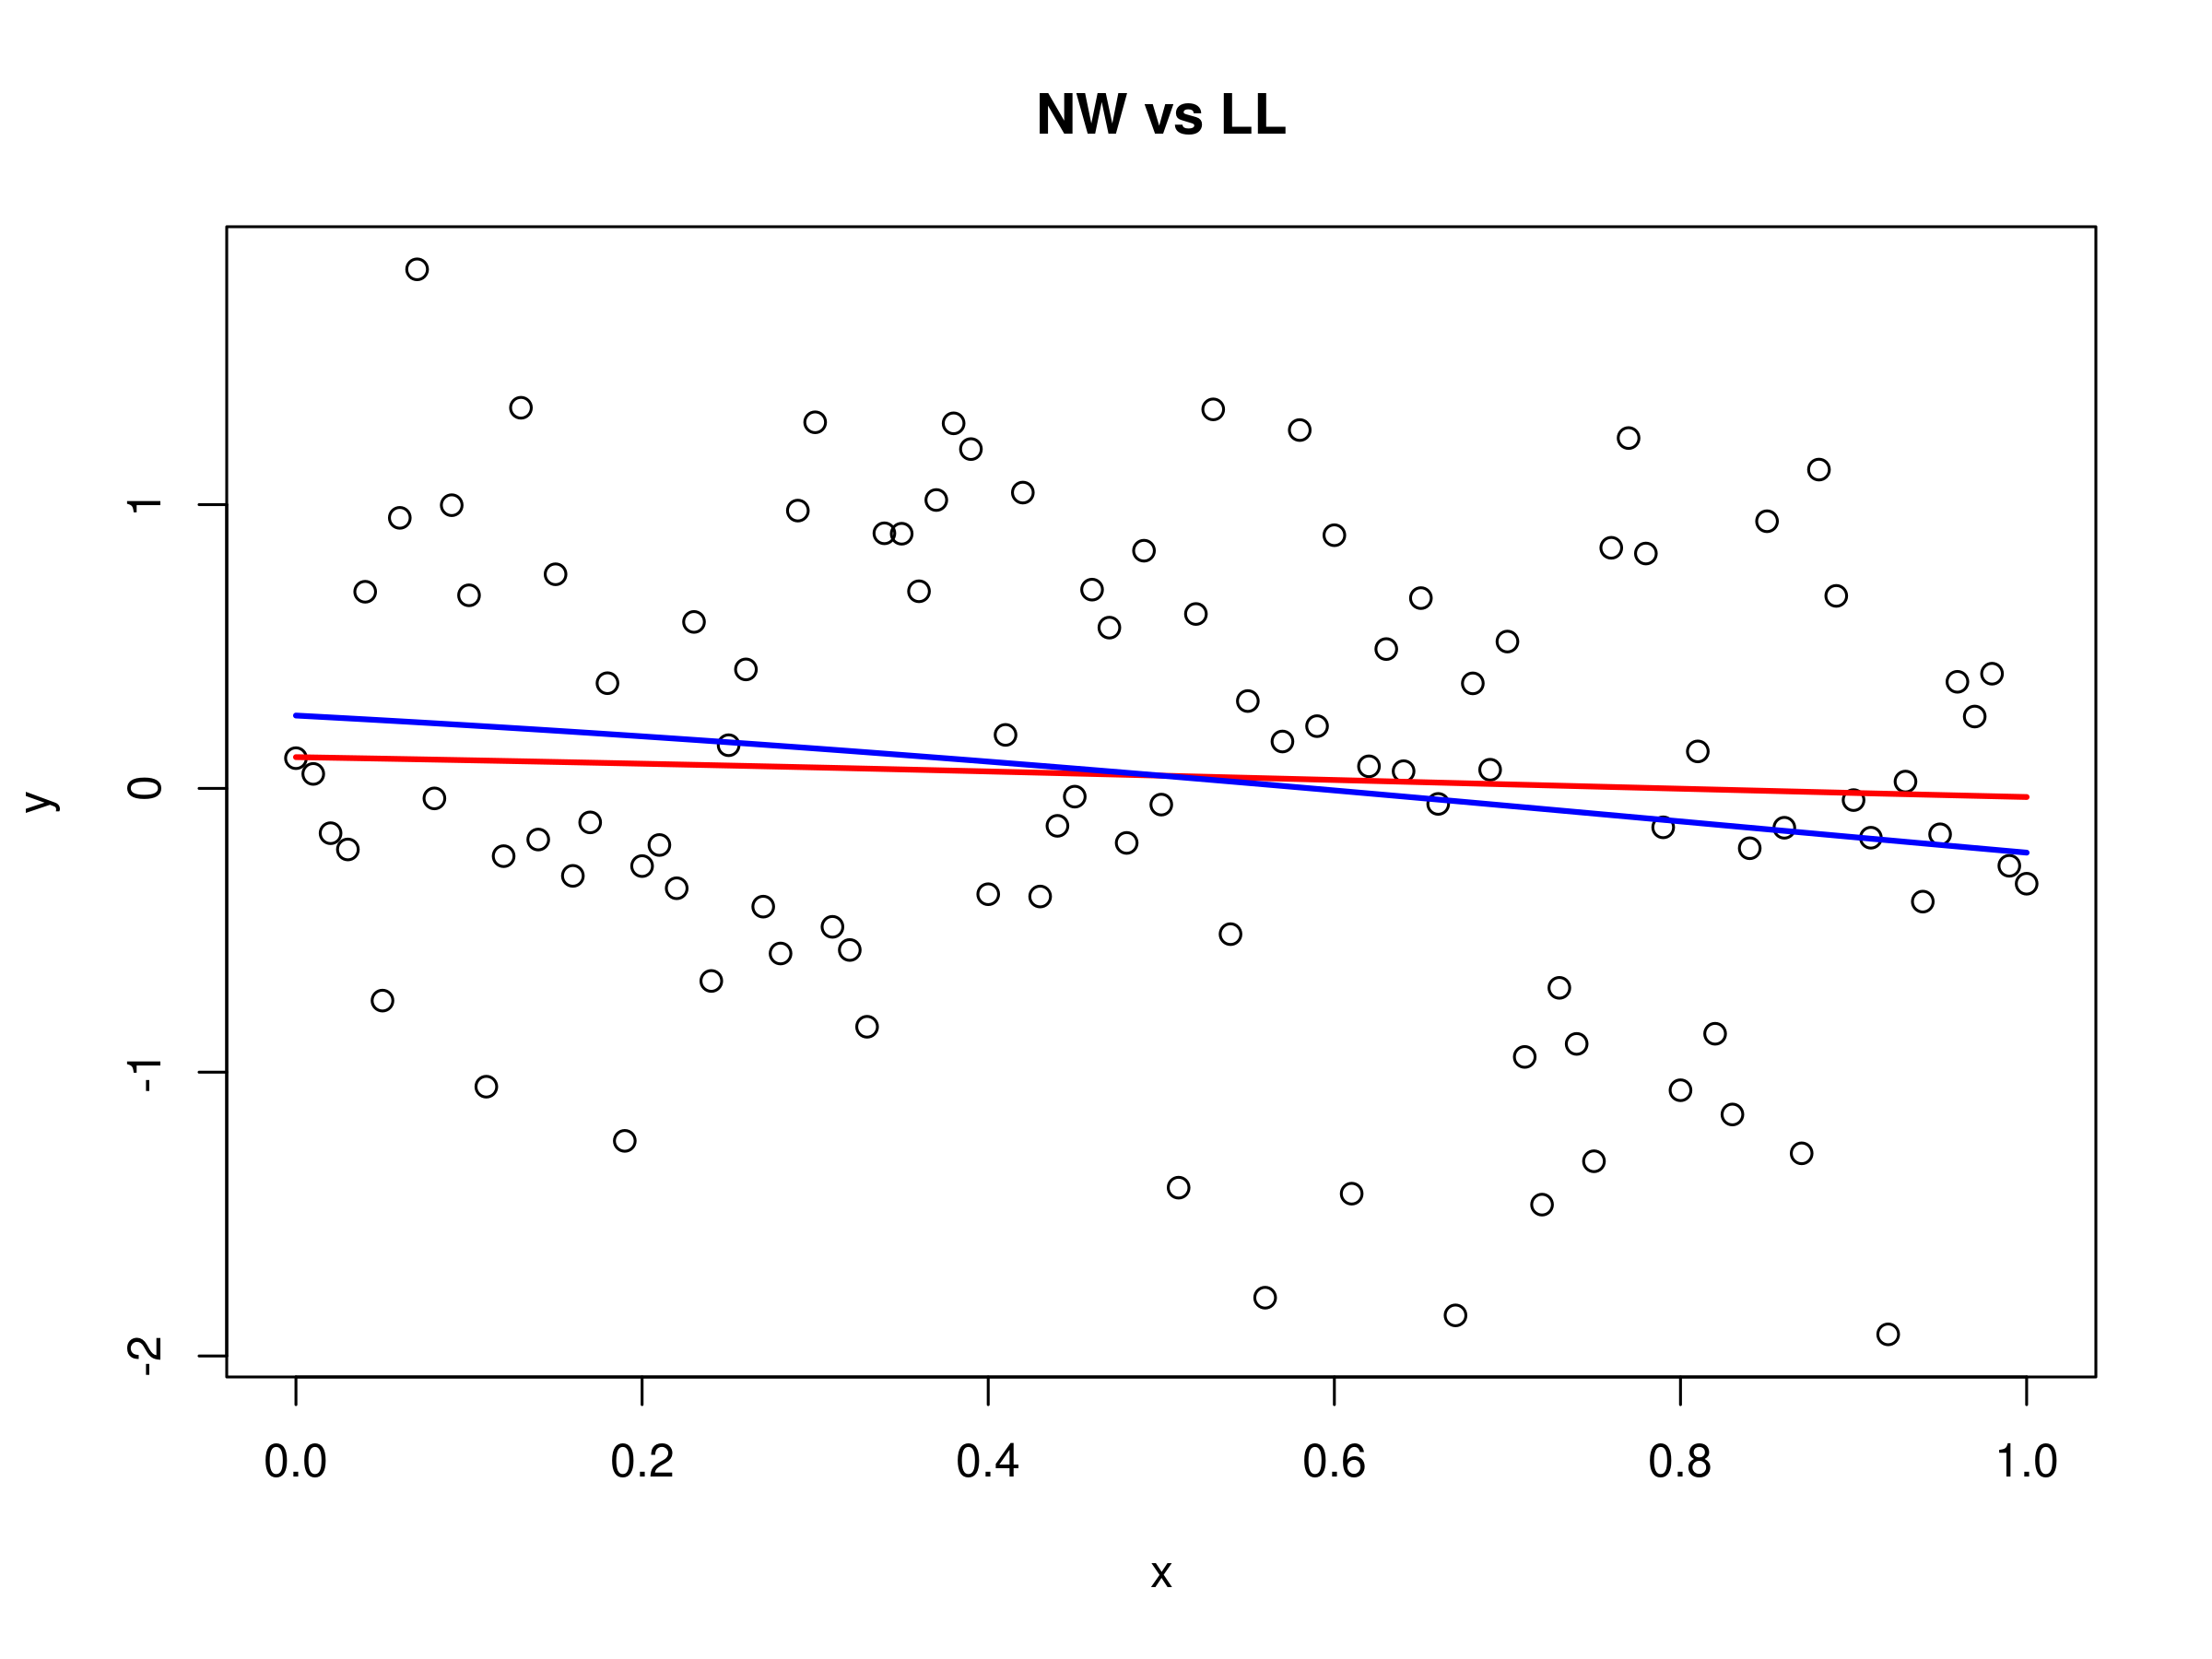

In [15]:
nw = npreg(y~x, regtype = "lc",bws=0.5)
plot(x,y,main="NW vs LL")
lines(x,nw$mean,col="red",lwd=2)

ll <- npreg(y~x,regtype = "ll",bws=0.5)
#plot(x,y)
lines(x,ll$mean,col="blue",lwd=2)

legend(0,2.5,c("NW","LL"),col=c(2,12),lty=c(1,1))